# Canadian Data Science Jobs Analysis

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Structure Overhaul](#data-structure-overhaul)
        - [Header Style](#header-style)
        - [Formatting and Data Usage](#formatting-and-data-usage)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Job Characteristics & Availability](#)
        - [Total Available Jobs](#)
        - [Data Science Job Categories](#)
        - [Job Salaries by Type](#)
        - [Jobs Offered by Platform](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

2024 has been a difficult year for entry-level data science jobs and for this project, I am interested in analyzing the data science field job market. For this project, I am utilizing a Kaggle-based dataset that web-scraped Indeed and Glassdoor Canadian job postings for data using Selenium and BeautifulSoup. This dataset provides multiple interesting insights into the data science job market such as in-demand technical skills, expected work experience, and salary ranges.  

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from collections import Counter

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('Raw_Dataset.csv', sep=',')
except:
    df = pd.read_csv('/datasets/Raw_Dataset.csv', sep=',')

df.head()

,Job ID,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
0,job_9c7f38160c736c78,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,job_0da15fed6a515fe5,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,job_2dc0470241aa6066,Geophysicist/Data Analyst,Sander Geophysics Limited,NaN,NaN,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,job_cbbe0e29b236d2b5,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,job_fe8ad423818b244a,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


[Back to Table of Contents](#back)

## Pre-Processing Data

### Duplicates

In [3]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [4]:
# Checking for null values
df.isna().sum()

Job ID                  0
Job Title               0
Company Name            0
Language and Tools    167
Job Salary            557
City                    0
Province              118
Job Link                0
dtype: int64

In [5]:
# Filling in null values
df.fillna({'Language and Tools': 'unknown',
           'Job Salary' : 'unknown',
           'Province' : 'unknown'}, inplace = True)
df.isna().sum()

Job ID                0
Job Title             0
Company Name          0
Language and Tools    0
Job Salary            0
City                  0
Province              0
Job Link              0
dtype: int64

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [6]:
# Removing columns we do not need for this analysis
df = df.drop(columns=['Job ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           1796 non-null   object
 1   Company Name        1796 non-null   object
 2   Language and Tools  1796 non-null   object
 3   Job Salary          1796 non-null   object
 4   City                1796 non-null   object
 5   Province            1796 non-null   object
 6   Job Link            1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


[Back to Table of Contents](#back)

### Data Structure Overhaul

In [7]:
df.describe()

,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
count,1796,1796,1796,1796,1796,1796,1796
unique,811,790,1057,855,172,14,1761
top,Business Analyst,Scotiabank,unknown,unknown,Toronto,ON,https://www.glassdoor.ca/job-listing/business-...
freq,90,24,167,557,426,949,3


#### Header Style

In [8]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           1796 non-null   object
 1   Company Name        1796 non-null   object
 2   Language and Tools  1796 non-null   object
 3   Job Salary          1796 non-null   object
 4   City                1796 non-null   object
 5   Province            1796 non-null   object
 6   Job Link            1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,Geophysicist/Data Analyst,Sander Geophysics Limited,unknown,unknown,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


In [9]:
#checking for snakecase format
df.columns

Index(['Job Title', 'Company Name', 'Language and Tools', 'Job Salary', 'City',
       'Province', 'Job Link'],
      dtype='object')

In [10]:
# Renaming column names to snake_case format
df = df.rename(columns={'Job Title': 'job_title',
                        'Company Name': 'employer_name',
                        'Language and Tools': 'tech_skills',
                        'Job Salary': 'salary',
                        'City': 'city',
                        'Province': 'province',
                        'Job Link': 'web_platform'})
df.columns

Index(['job_title', 'employer_name', 'tech_skills', 'salary', 'city',
       'province', 'web_platform'],
      dtype='object')

[Back to Table of Contents](#back)

#### Formatting and Data Usage

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      1796 non-null   object
 1   employer_name  1796 non-null   object
 2   tech_skills    1796 non-null   object
 3   salary         1796 non-null   object
 4   city           1796 non-null   object
 5   province       1796 non-null   object
 6   web_platform   1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


,job_title,employer_name,tech_skills,salary,city,province,web_platform
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,Geophysicist/Data Analyst,Sander Geophysics Limited,unknown,unknown,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


In [12]:
# Changing all elements into snakecase format
for column in df.columns:
  df[column] = df[column].str.lower()
  df[column] = df[column].str.replace(' ', '_')

df.head()

,job_title,employer_name,tech_skills,salary,city,province,web_platform
0,binance_accelerator_program_-_data_analyst_(risk),binance,"python,_sql",unknown,remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",unknown,remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,geophysicist/data_analyst,sander_geophysics_limited,unknown,unknown,ottawa,on,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,business_intelligence_data_engineer,"maximus_services,_llc","fabric,_power_bi,_sql,_machine_learning,_genes...","87,875ã¢â‚¬â€œ$105,000_a_year",toronto,on,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,"business_intelligence_specialist,_ft",niagara_health_system,"azure,_power_bi,_sql,_aws",55.39ã¢â‚¬â€œ$62.66_an_hour,niagara,on,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


experience level

In [13]:
df['job_title'].unique()

array(['binance_accelerator_program_-_data_analyst_(risk)',
       'business_analyst', 'geophysicist/data_analyst',
       'business_intelligence_data_engineer',
       'business_intelligence_specialist,_ft',
       'continuous_improvement_analyst', 'it_business_process_analyst',
       'computer_programmer/analyst',
       'senior_developer,_business_intelligence',
       'opgt_mod_ã¢â‚¬â€œ_one_(1)_business_analyst_ã¢â‚¬â€œ_senior',
       'business_analyst/quality_assurance_analyst',
       'capital_&_maintenance_program_analyst', 'senior_policy_analyst',
       'business_operations_analyst_(1_year_contract)',
       'senior_business_systems_analyst',
       'research_analyst_-_translational_addiction_research_laboratory',
       'payroll_analyst', 'lead_business_analyst', 'data_analyst',
       'hr_technology_lead_and_data_analyst', 'business_data_analyst',
       '(data-driven)_marketing_analyst', 'quality_analyst',
       'technology_risk_analyst', 'technical_support_analyst_',
  

In [14]:
df['job_title'] = df['job_title'].str.replace('[^a-zA-Z0-9_]', '')

def exp_level(value):
    if 'senior' in value:
        return 'senior'
    
    if 'sr' in value:
        return 'senior'
    
    if 'lead' in value:
        return 'senior'
    
    elif 'jr' in value:
        return 'middle'
    
    elif 'junior' in value:
        return 'middle'
    
    elif 'intermediate' in value:
        return 'middle'
    
    elif 'entry' in value:
        return 'entry-level'
    
    elif 'intern' in value:
        return 'entry-level'
    
    elif 'student' in value:
        return 'entry-level'
    
    else:
        return 'any'

df['experience_level'] = df['job_title'].apply(exp_level)
df['experience_level'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_3220\2671501453.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['job_title'] = df['job_title'].str.replace('[^a-zA-Z0-9_]', '')


array(['any', 'senior', 'entry-level', 'middle'], dtype=object)

job title

In [15]:
df['job_title'].unique()

array(['binance_accelerator_program__data_analyst_risk',
       'business_analyst', 'geophysicistdata_analyst',
       'business_intelligence_data_engineer',
       'business_intelligence_specialist_ft',
       'continuous_improvement_analyst', 'it_business_process_analyst',
       'computer_programmeranalyst',
       'senior_developer_business_intelligence',
       'opgt_mod__one_1_business_analyst__senior',
       'business_analystquality_assurance_analyst',
       'capital__maintenance_program_analyst', 'senior_policy_analyst',
       'business_operations_analyst_1_year_contract',
       'senior_business_systems_analyst',
       'research_analyst__translational_addiction_research_laboratory',
       'payroll_analyst', 'lead_business_analyst', 'data_analyst',
       'hr_technology_lead_and_data_analyst', 'business_data_analyst',
       'datadriven_marketing_analyst', 'quality_analyst',
       'technology_risk_analyst', 'technical_support_analyst_',
       'technical_support_analyst__

In [16]:
def clean_title(value):
    if 'data_analyst' in value:
        return 'data_analyst'
    
    elif 'scien' in value:
        return 'data_scientist'
    
    elif 'engineer' in value:
        return 'data_engineer'
    
    elif 'business_intelligence' in value:
        return 'business_intelligence_analyst'
    
    elif 'business_system' in value:
        return 'business_systems_analyst'
    
    elif 'business_analyst' in value:
        return 'business_analyst'
    
    elif 'research' in value:
        return 'research_analyst'
    
    elif 'quality' in value:
        return 'quality_analyst'
    
    elif 'marketing' in value:
        return 'marketing_analyst'
    
    elif 'risk' in value:
        return 'risk_analyst'
    
    elif 'investment' in value:
        return 'financial_analyst'
    
    elif 'asset' in value:
        return 'financial_analyst'
    
    elif 'bank' in value:
        return 'financial_analyst'
    
    elif 'sale' in value:
        return 'financial_analyst'
    
    else:
        return 'analyst'
        
df['job_title'] = df['job_title'].apply(clean_title)
df['job_title'].unique()

array(['data_analyst', 'business_analyst', 'data_engineer',
       'business_intelligence_analyst', 'analyst',
       'business_systems_analyst', 'research_analyst',
       'marketing_analyst', 'quality_analyst', 'risk_analyst',
       'financial_analyst', 'data_scientist'], dtype=object)

company name

In [17]:
df['employer_name'].unique()

array(['binance', 'canadian_nuclear_laboratories',
       'sander_geophysics_limited', 'maximus_services,_llc',
       'niagara_health_system', 'imp_group', 'ground_effects',
       'the_city_of_vancouver', 'ontario_health', 'softline_technology',
       'dll', 'toronto_hydro', 'insurance_council_of_bc',
       'tmx_group_limited', 'royal_bank_of_canada',
       'centre_for_addiction_and_mental_health', 'cenovus_energy',
       'toronto_transit_commission', 'city_of_barrie', 'accencis_group',
       'weyburn_credit_union', 'closing_the_gap_healthcare',
       'bmo_financial_group', 'banff_caribou_properties_ltd.', 'seequent',
       'university_of_alberta', 'mackenzie_financial_corporation',
       'cloudmd_software_&_services_inc_-_can', 'banque_laurentienne',
       'b.c._college_of_nurses_and_midwives',
       'canada_life_assurance_company', 'keewee', 'snaplii', 'cae',
       'electronic_arts', 'cnooc_international', 'appcast',
       'bridgenext,_inc', 'leonardo_drs', 'autodesk',


In [18]:
df['employer_name'] = df['employer_name'].str.replace('[^a-zA-Z0-9_]', '')

def clean_employer_name(value):
    if 'financ' in value:
        return 'finance'
    
    elif 'invest' in value:
        return 'finance'
    
    elif 'capital' in value:
        return 'finance'

    elif 'wealth' in value:
        return 'finance'
    
    elif 'manage' in value:
        return 'finance'
    
    elif 'credit' in value:
        return 'finance'
    
    elif 'business' in value:
        return 'finance'
    
    elif 'college' in value:
        return 'education'
    
    elif 'university' in value:
        return 'education'
    
    elif 'school' in value:
        return 'education'
    
    elif 'edu' in value:
        return 'education'
    
    elif 'trans' in value:
        return 'transportation'
    
    elif 'express' in value:
        return 'transportation'
    
    elif 'rail' in value:
        return 'transportation'

    elif 'media' in value:
        return 'media'
    
    elif 'bank' in value:
        return 'banking'
    
    elif 'city' in value:
        return 'government'
    
    elif 'public' in value:
        return 'government'
    
    elif 'police' in value:
        return 'government'
    
    elif 'govern' in value:
        return 'government'
    
    elif 'energy' in value:
        return 'energy'

    elif 'nuclear' in value:
        return 'energy'
    
    elif 'elect' in value:
        return 'energy'
    
    elif 'spark' in value:
        return 'energy'
    
    elif 'insurance' in value:
        return 'insurance'
    
    elif 'health' in value:
        return 'healthcare'
    
    elif 'hospital' in value:
        return 'healthcare'
    
    elif 'medic' in value:
        return 'healthcare'
    
    elif 'pharma' in value:
        return 'healthcare'
    
    elif 'care' in value:
        return 'healthcare'
    
    elif 'farm' in value:
        return 'agriculture'
    
    elif 'metal' in value:
        return 'manufacturing'
    
    elif 'engineer' in value:
        return 'manufacturing'
    
    elif 'manufactur' in value:
        return 'manufacturing'
    
    elif 'machine' in value:
        return 'manufacturing'
    
    elif 'construction' in value:
        return 'construction'
    
    elif 'contracting' in value:
        return 'construction'
    
    elif 'tech' in value:
        return 'technology'
    
    elif 'web' in value:
        return 'technology'
    
    elif 'soft' in value:
        return 'technology'
    
    elif 'systems' in value:
        return 'technology'
    
    elif 'amazon' in value:
        return 'technology'
    
    elif 'estate' in value:
        return 'real_estate'

    elif 'properties' in value:
        return 'real_estate'
    
    elif 'property' in value:
        return 'real_estate'
    
    elif 'macdonald' in value:
        return 'real_estate'
    
    elif 'consult' in value:
        return 'consulting'
    
    elif 'communication' in value:
        return 'telecommunication'
    
    elif 'radio' in value:
        return 'telecommunication'
    
    elif 'food' in value:
        return 'retail'
    
    elif 'walmart' in value:
        return 'retail'
    
    elif 'pepsico' in value:
        return 'retail'
    
    elif 'supermarket' in value:
        return 'retail'
    
    elif 'resort' in value:
        return 'travel'
    
    elif 'travel' in value:
        return 'travel'
    
    elif 'air' in value:
        return 'aerospace'
    
    elif 'flight' in value:
        return 'aerospace'
    
    elif 'aviation' in value:
        return 'aerospace'
    
    elif 'aero' in value:
        return 'aerospace'
    
    elif 'auto' in value:
        return 'automobile'
    
    elif 'driv' in value:
        return 'automobile'
    
    elif 'service' in value:
        return 'service'
    
    else:
        return 'other'
        
df['industry'] = df['employer_name'].apply(clean_employer_name)
df['industry'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_3220\4030345053.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['employer_name'] = df['employer_name'].str.replace('[^a-zA-Z0-9_]', '')


array(['other', 'energy', 'service', 'healthcare', 'government',
       'technology', 'insurance', 'banking', 'transportation', 'finance',
       'real_estate', 'education', 'automobile', 'aerospace', 'retail',
       'consulting', 'construction', 'manufacturing', 'media',
       'agriculture', 'telecommunication', 'travel'], dtype=object)

work location

In [19]:
df['city'].unique()

array(['remote', 'ottawa', 'toronto', 'niagara', 'abbotsford', 'windsor',
       'vancouver', 'burlington', 'calgary', 'barrie', 'richmond_hill',
       'weyburn', 'mississauga', 'banff', 'edmonton',
       'greater_toronto_area', 'montrãƒâ©al', 'remote_in_beauceville',
       'london', 'remote_in_charlottetown', 'saint-laurent',
       'fredericton', 'bedford', 'remote_in_toronto', 'brampton',
       'vaughan', 'surrey', 'red_lake', 'winnipeg', 'laval', 'halifax',
       'dieppe', 'vernon', 'dorval', 'bolton', 'sherbrooke', 'victoria',
       'north_york', 'oakville', 'richmond', 'burnaby',
       'metro_vancouver_regional_district', 'berwick',
       'remote_in_moncton', 'remote_in_mount_pearl', 'remote_in_milton',
       'remote_in_boucherville', 'remote_in_woodstock',
       'remote_in_ottawa', 'remote_in_kelowna', 'remote_in_lakeside',
       'remote_in_mississauga', 'remote_in_winnipeg', 'remote_in_regina',
       'remote_in_victoria', 'remote_in_port_coquitlam',
       'remote_i

In [20]:
df['city'] = df['city'].str.replace('[^_a-zA-Z]', '')

def work_location(value):
    if 'remote' in  value:
        return 'remote'
    else:
        return 'on-site'

df['work_location'] = df['city'].apply(work_location)
df['work_location'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_3220\1930607163.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace('[^_a-zA-Z]', '')


array(['remote', 'on-site'], dtype=object)

In [21]:
def clean_city(value):
    if value.startswith('remote_in_'):
        return value[10:]
    
    elif 'vancouver' in  value:
        return 'vancouver'
    
    elif 'toronto' in  value:
        return 'toronto'
    
    elif value.startswith('_'):
        return value[1:]
    
    else:
        return value

df['city'] = df['city'].str.replace('montral', 'montreal')
df['city'] = df['city'].apply(clean_city)
df['city'].unique()

array(['remote', 'ottawa', 'toronto', 'niagara', 'abbotsford', 'windsor',
       'vancouver', 'burlington', 'calgary', 'barrie', 'richmond_hill',
       'weyburn', 'mississauga', 'banff', 'edmonton', 'montreal',
       'beauceville', 'london', 'charlottetown', 'saintlaurent',
       'fredericton', 'bedford', 'brampton', 'vaughan', 'surrey',
       'red_lake', 'winnipeg', 'laval', 'halifax', 'dieppe', 'vernon',
       'dorval', 'bolton', 'sherbrooke', 'victoria', 'north_york',
       'oakville', 'richmond', 'burnaby', 'berwick', 'moncton',
       'mount_pearl', 'milton', 'boucherville', 'woodstock', 'kelowna',
       'lakeside', 'regina', 'port_coquitlam', 'thunder_bay', 'squamish',
       'south_dundas', 'hamilton', 'waterloo', 'waterdown', 'saskatoon',
       'whitehorse', 'okotoks', 'thornhill', 'concord', 'sparwood',
       'yellowknife', 'markham', 'bradford', 'etobicoke', 'leduc',
       'rocky_view_county', 'st_catharines', 'lakeshore', 'st_thomas',
       'york', 'st_paul', 'lac

province

In [22]:
df['province'].unique()

array(['unknown', 'on', 'bc', 'ab', 'sk', 'qc', 'pe', 'nb', 'ns', 'mb',
       'nl', 'yt', 'nt', 'nfl'], dtype=object)

In [23]:
df['province'] = df['province'].replace('unknown', 'unspecified')
df['province'].unique()

array(['unspecified', 'on', 'bc', 'ab', 'sk', 'qc', 'pe', 'nb', 'ns',
       'mb', 'nl', 'yt', 'nt', 'nfl'], dtype=object)

salary

In [24]:
df['salary'].unique()

array(['unknown', '87,875ã¢â‚¬â€œ$105,000_a_year',
       '55.39ã¢â‚¬â€œ$62.66_an_hour',
       '43.82ã¢â‚¬â€œ$51.78_an_hour,_43.82_to_$,_51.78_per_hour',
       '75,898ã¢â‚¬â€œ$113,847_a_year,_75,898_-_$,_113,847_dll_is',
       '47.62ã¢â‚¬â€œ$56.27_an_hour,_47.62_to_$,_56.27_per_hour',
       '89,606ã¢â‚¬â€œ$128,809_a_year,_$89,606_-_$_128,809_with,_128,809_with_a,_112,008_per_annum',
       '27.48ã¢â‚¬â€œ$36.65_an_hour',
       '83,192ã¢â‚¬â€œ$104,013_a_year,_1_department_:_talent,_83,192.00_-_$,_104,013.00_pay_scale',
       '95,106.71_to_$,_127,429.57_hourly_pay,_$52.26_to_$70.02_benefits_:',
       '43.50_an_hour',
       '61,181ã¢â‚¬â€œ$76,458_a_year,_61,181_to_$,_76,458_based_on',
       '74,800ã¢â‚¬â€œ$138,600_a_year,_74,800.00_-_$,_138,600.00_pay_type',
       '54,764.33ã¢â‚¬â€œ$73,940.15_a_year,_54,764.33_to_$',
       'approximately_$252_billion_in_total',
       '45,000ã¢â‚¬â€œ$50,000_a_year',
       '104,423ã¢â‚¬â€œ$109,644_a_year,_104,423_ã¢â‚¬_â€œ,_109,644_annually_,',


In [25]:
df['salary'] = df['salary'].str.replace('[^kK0-9$.-]', '')
df['salary'] = df['salary'].str.replace('k', '000')
df['salary'] = df['salary'].str.replace('K', '000')
df['salary'] = df['salary'].str.replace('$', '-')
df['salary'] = df['salary'].str.replace('--', '-')
df['salary'] = df['salary'].str.replace('\.00', '')
df['salary'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_3220\1612757097.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('[^kK0-9$.-]', '')
C:\Users\jason\AppData\Local\Temp\ipykernel_3220\1612757097.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$', '-')
C:\Users\jason\AppData\Local\Temp\ipykernel_3220\1612757097.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('\.00', '')


array(['000', '87875-105000', '55.39-62.66', '43.82-51.7843.82-51.78',
       '75898-11384775898-113847', '47.62-56.2747.62-56.27',
       '89606-128809-89606-128809128809112008', '27.48-36.65',
       '83192-104013183192-104013', '95106.71-127429.57-52.26-70.02',
       '43.50', '61181-7645861181-76458', '74800-13860074800-138600',
       '54764.33-73940.1554764.33-', '-252', '45000-50000',
       '104423-109644104423109644', '54500-81800-54500-81800.', '-250',
       '107600-147100-107600-147100147100', '2020', '83500-149300',
       '-271', '46', '-1.3-1.0-0.4-0.3-0.3-0.3.-59570-110630',
       '61181-7645861181-7645861181-76458', '105000', '50-5850-58',
       '76071.18-86658.4876071.18-86658.48', '11-75223.75223.96196.',
       '-100000', '69000.10-84021.082653.85-69000.10-2653.85-',
       '79500-10600079500-106000', '90000-11000090000-110000',
       '82800-103500', '51.89-61.93-51.89-61.9361.93', '38',
       '68000-85000-1500-68000-850008500068000-85000', '28.40',
       '1058

In [26]:
def format_sal(value):
    if str(value).startswith('-'):
        return value[1:]
    
    if str(value).endswith('-'):
        return value[:-1]

    if str(value).endswith('.'):
        return value[:-1]
    
    if str(value).endswith('..'):
        return value[:-2]
    
    else:
        return value

df['salary'] = df['salary'].apply(format_sal)
df['salary'].unique()

array(['000', '87875-105000', '55.39-62.66', '43.82-51.7843.82-51.78',
       '75898-11384775898-113847', '47.62-56.2747.62-56.27',
       '89606-128809-89606-128809128809112008', '27.48-36.65',
       '83192-104013183192-104013', '95106.71-127429.57-52.26-70.02',
       '43.50', '61181-7645861181-76458', '74800-13860074800-138600',
       '54764.33-73940.1554764.33', '252', '45000-50000',
       '104423-109644104423109644', '54500-81800-54500-81800', '250',
       '107600-147100-107600-147100147100', '2020', '83500-149300', '271',
       '46', '1.3-1.0-0.4-0.3-0.3-0.3.-59570-110630',
       '61181-7645861181-7645861181-76458', '105000', '50-5850-58',
       '76071.18-86658.4876071.18-86658.48', '11-75223.75223.96196',
       '100000', '69000.10-84021.082653.85-69000.10-2653.85',
       '79500-10600079500-106000', '90000-11000090000-110000',
       '82800-103500', '51.89-61.93-51.89-61.9361.93', '38',
       '68000-85000-1500-68000-850008500068000-85000', '28.40',
       '105800-138800

In [27]:
def repeating_sal_value(value):
    if len(str(value)) <= 1:
        return str(value)
    
    if str(value)[0:5] == str(value)[5:10]:
        return str(value)[5:]
    
    if str(value)[0:6] == str(value)[6:12]:
        return str(value)[6:]
    
    if str(value)[0:7] == str(value)[6:14]:
        return str(value)[7:]
    
    if str(value)[0:11] == str(value)[11:22]:
        return str(value)[11:]

    if str(value)[0:12] == str(value)[12:24]:
        return str(value)[12:]

    if str(value)[0:12] == str(value)[13:25]:
        return str(value)[:12]  
    
    if str(value)[0:5] == str(value)[12:17]:
        return str(value)[12:]
    
    if str(value)[0:13] == str(value)[14:26]:
        return str(value)[13:]
    
    if str(value)[0:6] == str(value)[13:19]:
        return str(value)[13:]
    
    if str(value)[0:11] == str(value)[11:22]:
        return str(value)[11:]
    
    if str(value)[0:17] == str(value)[17:34]:
        return str(value)[17:]
    
    if str(value)[6:11] == str(value)[11:16]:
        return str(value)[11:]

    if str(value)[0:5] == str(value)[11:16]:
        return str(value)[11:]
    
    if str(value)[9:17] == str(value)[17:25]:
        return str(value)[17:]
    
    else:
        return str(value)
    
df['salary'] = df['salary'].apply(repeating_sal_value)
df['salary'] = df['salary'].apply(format_sal)
df['salary'].unique()

array(['', '87875-105000', '55.39-62.66', '43.82-51.78', '75898-113847',
       '47.62-56.27', '89606-128809', '27.48-36.65', '83192-104013',
       '95106.71-127429.57-52.26-70.02', '61181-76458', '74800-138600',
       '54764.33-73940.1554764.33', '45000-50000', '104423109644',
       '54500-81800', '107600-147100-107600-147100147100', '83500-149300',
       '1.3-1.0-0.4-0.3-0.3-0.3.-59570-110630', '61181-7645861181-76458',
       '50-58', '76071.18-86658.48', '11-75223.75223.96196',
       '69000.10-84021.082653.85-69000.10-2653.85', '79500-106000',
       '90000-110000', '82800-103500', '51.89-61.9361.93',
       '68000-85000-1500-68000-850008500068000-85000', '105800-13880',
       '50000-70000', '70000-85000', '40.07-47.31', '65000-8500085000',
       '87000', '42.04-49.65', '69760.70-79322.6979322.69', '38.12-54.80',
       '7977-95937977-95939593', '61162-8897533.605-48.88788975',
       '46531-58164',
       '81239.90-101495.5938.908-48.60948.6093112.603888.7081239.90101495.59

In [28]:
def two_values(value):
    if '-' in value:
        return value
    
    elif value.startswith('0'):
        return value
    
    else:
        return (f'{value}-{value}')
    
def cleaning_sal(value):
     if str(value).endswith('.'):
        return value[:-1]
     
     if str(value).startswith('-'):
        return value[1:]
     
     else:
         return value
    
    
df['salary'] = df['salary'].apply(two_values)
df['salary'] = df['salary'][df['salary'].str.len() < 20]
df['salary'] = df['salary'].apply(cleaning_sal)

df['salary'].fillna('0-0', inplace=True)
for i, item in enumerate(df['salary']):
       if item == '':
           df['salary'][i] = '0-0'

df['salary'].unique()

array(['0-0', '87875-105000', '55.39-62.66', '43.82-51.78',
       '75898-113847', '47.62-56.27', '89606-128809', '27.48-36.65',
       '83192-104013', '61181-76458', '74800-138600', '45000-50000',
       '54500-81800', '83500-149300', '50-58', '76071.18-86658.48',
       '79500-106000', '90000-110000', '82800-103500', '51.89-61.9361.93',
       '105800-13880', '50000-70000', '70000-85000', '40.07-47.31',
       '65000-8500085000', '87000-87000', '42.04-49.65', '38.12-54.80',
       '46531-58164', '45016-93603-68', '63800-76125', '37500-37500',
       '104000-104000', '42.1824-104', '80000-80000-100000',
       '54000-75000', '70000-90000', '65000-120000', '35.04-4335.04-43',
       '68000-91000', '1892355-123140', '120000-13000', '95000-105000',
       '82000-101000', '87872-136815', '58649-85218', '47266.40-64725.92',
       '56000-84000', '85000-133750', '35.652-43.400', '60000-111700',
       '40.12-45.39', '109000-159000', '32.94-36.7536.75',
       '100000-100000', '60000-75000',

In [29]:
new_sal = df['salary'].str.split('-', n=1, expand=True)

df['min_salary'] = new_sal[0]
df['max_salary'] = new_sal[1]
df.head()

,job_title,employer_name,tech_skills,salary,city,province,web_platform,experience_level,industry,work_location,min_salary,max_salary
0,data_analyst,binance,"python,_sql",0-0,remote,unspecified,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...,any,other,remote,0,0
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",0-0,remote,unspecified,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...,any,energy,remote,0,0
2,data_analyst,sander_geophysics_limited,unknown,0-0,ottawa,on,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...,any,other,on-site,0,0
3,data_engineer,maximus_services_llc,"fabric,_power_bi,_sql,_machine_learning,_genes...",87875-105000,toronto,on,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...,any,service,on-site,87875,105000
4,business_intelligence_analyst,niagara_health_system,"azure,_power_bi,_sql,_aws",55.39-62.66,niagara,on,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...,any,healthcare,on-site,55.39,62.66


In [30]:
df['min_salary'].unique()

array(['0', '87875', '55.39', '43.82', '75898', '47.62', '89606', '27.48',
       '83192', '61181', '74800', '45000', '54500', '83500', '50',
       '76071.18', '79500', '90000', '82800', '51.89', '105800', '50000',
       '70000', '40.07', '65000', '87000', '42.04', '38.12', '46531',
       '45016', '63800', '37500', '104000', '42.1824', '80000', '54000',
       '35.04', '68000', '1892355', '120000', '95000', '82000', '87872',
       '58649', '47266.40', '56000', '85000', '35.652', '60000', '40.12',
       '109000', '32.94', '100000', '75715', '45.53', '71500', '43.35',
       '71563', '77105', '43200', '64618.31', '42.394', '79786.18', '1',
       '89800', '45.44', '57200', '67450.89', '77335', '41.172', '80',
       '4', '55000', '5000', '59000', '20.01', '2', '30', '38000',
       '74242', '71000', '35000', '64513', '37.73', '69800', '44500',
       '52300', '59400', '58000', '45.64', '20000', '54300', '89300',
       '43.58', '3', '64731.76', '48000', '70', '92610', '23.76', '7640

In [31]:
df['min_salary'] = df['min_salary'].astype('float')

def hourly_pay_to_annual(value):
    if value < 999:
        return (value * 2080)
    else:
        return value

def sal_outliers(value):
    if value < 30000:
        return 0
    if value > 200000:
        return 0
    else:
        return value

df['min_salary'] = df['min_salary'].apply(hourly_pay_to_annual)
df['min_salary'] = df['min_salary'].apply(sal_outliers)
df['min_salary'] = df['min_salary'].astype('int')
df['min_salary'].unique()

array([     0,  87875, 115211,  91145,  75898,  99049,  89606,  57158,
        83192,  61181,  74800,  45000,  54500,  83500, 104000,  76071,
        79500,  90000,  82800, 107931, 105800,  50000,  70000,  83345,
        65000,  87000,  87443,  79289,  46531,  45016,  63800,  37500,
        87739,  80000,  54000,  72883,  68000, 120000,  95000,  82000,
        87872,  58649,  47266,  56000,  85000,  74156,  60000,  83449,
       109000,  68515, 100000,  75715,  94702,  71500,  90168,  71563,
        77105,  43200,  64618,  88179,  79786,  89800,  94515,  57200,
        67450,  77335,  85637, 166400,  55000,  59000,  41620,  62400,
        38000,  74242,  71000,  35000,  64513,  78478,  69800,  44500,
        52300,  59400,  58000,  94931,  54300,  89300,  90646,  64731,
        48000, 145600,  92610,  49420,  76400,  81000,  98000,  75000,
        41600,  77000,  66500,  72639,  66560, 140000,  83470,  72113,
        59822,  68960,  66000,  80932,  88990,  76065,  44000,  97599,
      

In [32]:
df['max_salary'].unique()

array(['0', '105000', '62.66', '51.78', '113847', '56.27', '128809',
       '36.65', '104013', '76458', '138600', '50000', '81800', '149300',
       '58', '86658.48', '106000', '110000', '103500', '61.9361.93',
       '13880', '70000', '85000', '47.31', '8500085000', '87000', '49.65',
       '54.80', '58164', '93603-68', '76125', '37500', '104000', '104',
       '80000-100000', '75000', '90000', '120000', '4335.04-43', '91000',
       '123140', '13000', '101000', '136815', '85218', '64725.92',
       '84000', '133750', '43.400', '111700', '45.39', '159000',
       '36.7536.75', '100000', '80000', '100652', '60000', '60.86',
       '10730089400', '57.96', '100052', '86637', '65000', '70800',
       '90053.44', '51.58251.582', '93866.14', '7000070000', '1',
       '166300', '11000', '101500', '53.46', '78000', '97437.66', '77335',
       '51.438', '100', '4', '58000', '80000-80000', '22.52', '2',
       '38--.30-38', '82000', '480002000', '92803', '10500095-105',
       '94000', '9018100

In [33]:
def clean_max_sal(value):
    if str(value)[0:5] == str(value)[5:10]:
        return str(value)[5:]
    
    elif str(value)[0:5] == str(value)[6:11]:
        return str(value)[5:]
    
    else:
        return value

df['max_salary'] = df['max_salary'].apply(clean_max_sal)
df['max_salary'] = df['max_salary'].str.replace('-', '')
df['max_salary'] = df['max_salary'].str.replace('None', '0')
df['max_salary'] = df['max_salary'][df['max_salary'].str.len() < 7]
df['max_salary'].fillna('0', inplace=True)
df['max_salary'].unique()

array(['0', '105000', '62.66', '51.78', '113847', '56.27', '128809',
       '36.65', '104013', '76458', '138600', '50000', '81800', '149300',
       '58', '106000', '110000', '103500', '61.93', '13880', '70000',
       '85000', '47.31', '87000', '49.65', '54.80', '58164', '76125',
       '37500', '104000', '104', '75000', '90000', '120000', '91000',
       '123140', '13000', '101000', '136815', '85218', '84000', '133750',
       '43.400', '111700', '45.39', '159000', '36.75', '100000', '80000',
       '100652', '60000', '60.86', '57.96', '100052', '86637', '65000',
       '70800', '1', '166300', '11000', '101500', '53.46', '78000',
       '77335', '51.438', '100', '4', '58000', '22.52', '2', '82000',
       '92803', '94000', '47.16', '140400', '82500', '103300', '118100',
       '65.60', '88300', '123000', '47.75', '3', '48000', '90', '103700',
       '25.90', '127600', '99000', '144100', '150000', '96000', '78200',
       '94431', '35', '140000', '40.13', '6', '49.83', '82266', '50',


In [34]:
df['max_salary'] = df['max_salary'].astype('float')
df['max_salary'] = df['max_salary'].apply(hourly_pay_to_annual)
df['max_salary'] = df['max_salary'].apply(sal_outliers)
df['max_salary'].fillna(0, inplace=True)
df['max_salary'] = df['max_salary'].astype('int')
df['max_salary'].unique()

array([     0, 105000, 130332, 107702, 113847, 117041, 128809,  76232,
       104013,  76458, 138600,  50000,  81800, 149300, 120640, 106000,
       110000, 103500, 128814,  70000,  85000,  98404,  87000, 103272,
       113984,  58164,  76125,  37500, 104000,  75000,  90000, 120000,
        91000, 123140, 101000, 136815,  85218,  84000, 133750,  90272,
       111700,  94411, 159000,  76440, 100000,  80000, 100652,  60000,
       126588, 120556, 100052,  86637,  65000,  70800, 166300, 101500,
       111196,  78000,  77335, 106991,  58000,  46841,  82000,  92803,
        94000,  98092, 140400,  82500, 103300, 118100, 136448,  88300,
       123000,  99320,  48000, 187200, 103700,  53872, 127600,  99000,
       144100, 150000,  96000,  78200,  94431,  72800, 140000,  83470,
       103646,  82266,  94820,  86600, 105773, 127923,  76065, 127555,
        55300,  86000, 113400, 113500, 107264, 114420,  84450,  93000,
       107000, 130000, 108000,  76000,  77000,  45000, 111000,  74000,
      

In [35]:
med_fillin = df[(df['min_salary'] > 0) & (df['max_salary'] > 0)].groupby('job_title').agg({'min_salary': 'median',
                                                                                           'max_salary': 'median'})

med_fillin.columns = ['median_min_sal', 'median_max_sal']
med_fillin = med_fillin.astype('int')
med_fillin

,median_min_sal,median_max_sal
job_title,,
analyst,65000,84500
business_analyst,65500,92500
business_intelligence_analyst,80000,96500
business_systems_analyst,70000,95000
data_analyst,68819,90000
data_engineer,90000,110000
data_scientist,84000,123000
financial_analyst,60000,97500
marketing_analyst,61090,76229


In [36]:
df.loc[((df['job_title'] == 'analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][0])
df.loc[((df['job_title'] == 'analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][0])

df.loc[((df['job_title'] == 'business_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][1])
df.loc[((df['job_title'] == 'business_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][1])

df.loc[((df['job_title'] == 'business_intelligence_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][2])
df.loc[((df['job_title'] == 'business_intelligence_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][2])

df.loc[((df['job_title'] == 'business_systems_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][3])
df.loc[((df['job_title'] == 'business_systems_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][3])

df.loc[((df['job_title'] == 'data_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][4])
df.loc[((df['job_title'] == 'data_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][4])

df.loc[((df['job_title'] == 'data_engineer') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][5])
df.loc[((df['job_title'] == 'data_engineer') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][5])

df.loc[((df['job_title'] == 'data_scientist') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][6])
df.loc[((df['job_title'] == 'data_scientist') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][6])

df.loc[((df['job_title'] == 'financial_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][7])
df.loc[((df['job_title'] == 'financial_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][7])

df.loc[((df['job_title'] == 'marketing_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][8])
df.loc[((df['job_title'] == 'marketing_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][8])

df.loc[((df['job_title'] == 'quality_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][9])
df.loc[((df['job_title'] == 'quality_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][9])

df.loc[((df['job_title'] == 'research_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][10])
df.loc[((df['job_title'] == 'research_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][10])

df.loc[((df['job_title'] == 'risk_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][11])
df.loc[((df['job_title'] == 'risk_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][11])

In [37]:
df['avg_salary'] = ((df['min_salary'] + df['max_salary']) / 2).round(2)
df['avg_salary'] = df['avg_salary'].astype('int')

df = df.drop(columns=['salary'])


print(df['min_salary'].min())
print(df['max_salary'].min())
print(df['avg_salary'].min())

34611
37500
36500


web_platform

In [38]:
df['web_platform'].unique()

array(['https://ca.indeed.com/rc/clk?jk=9c7f38160c736c78&bb=jmruzegvy_2zalhxc3miarbrfhvpjxoqvuat4gd16kuzbzqrzaincbr5w5gdefrfr5lvttdosyg3qraanlxcud9iaz4zngshhlixaeof9ezgpfkdnjt04v6cwqv09nog&xkcb=sobd67m39kh62wxbjh0lbzkdcdpp&fccid=ac2ee5578fa99fc9&vjs=3',
       'https://ca.indeed.com/rc/clk?jk=0da15fed6a515fe5&bb=jmruzegvy_2zalhxc3miapjgjclvcfqucxinmd0zx2fshgsye-wbutyscwefufuqm7kud9rgnijbjxw5y4k44be95otvsctpsv-_tqrmi8c76pdkhl3qnw%3d%3d&xkcb=sodp67m39kh62wxbjh0kbzkdcdpp&fccid=a0da53533519eae5&vjs=3',
       'https://ca.indeed.com/rc/clk?jk=2dc0470241aa6066&bb=jmruzegvy_2zalhxc3miag9ccuaulow1dzrh0spiltfpceyi0f2m_v0njmm3elktji6ouhs2jvoouz1hcgxjwqz2odtgrbbdrvebiynjejz0unmkp5mtk3blskfesl9l&xkcb=sob067m39kh62wxbjh0jbzkdcdpp&fccid=cf2319525eb667d8&cmp=sander-geophysics&ti=data+analyst&vjs=3',
       ...,
       'https://www.glassdoor.ca/job-listing/business-intelligence-analyst-clio-jv_ic2278756_ko0,29_ke30,34.htm?jl=1009218395921',
       'https://www.glassdoor.ca/job-listing/analyst-supply-c

In [39]:
def clean_web(value):
    if value.startswith('https://ca.indeed'):
        return 'indeed'

    elif value.startswith('https://www.glassdoor'):
        return 'glassdoor'
        
df['web_platform'] = df['web_platform'].apply(clean_web)
df['web_platform'].unique()

array(['indeed', 'glassdoor'], dtype=object)

[Back to Table of Contents](#back)

## Exploratory Data Analysis

In [40]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         1796 non-null   object
 1   employer_name     1796 non-null   object
 2   tech_skills       1796 non-null   object
 3   city              1796 non-null   object
 4   province          1796 non-null   object
 5   web_platform      1796 non-null   object
 6   experience_level  1796 non-null   object
 7   industry          1796 non-null   object
 8   work_location     1796 non-null   object
 9   min_salary        1796 non-null   int32 
 10  max_salary        1796 non-null   int32 
 11  avg_salary        1796 non-null   int32 
dtypes: int32(3), object(9)
memory usage: 147.5+ KB


,job_title,employer_name,tech_skills,city,province,web_platform,experience_level,industry,work_location,min_salary,max_salary,avg_salary
0,data_analyst,binance,"python,_sql",remote,unspecified,indeed,any,other,remote,68819,90000,79409
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",remote,unspecified,indeed,any,energy,remote,65500,92500,79000
2,data_analyst,sander_geophysics_limited,unknown,ottawa,on,indeed,any,other,on-site,68819,90000,79409
3,data_engineer,maximus_services_llc,"fabric,_power_bi,_sql,_machine_learning,_genes...",toronto,on,indeed,any,service,on-site,87875,105000,96437
4,business_intelligence_analyst,niagara_health_system,"azure,_power_bi,_sql,_aws",niagara,on,indeed,any,healthcare,on-site,115211,130332,122771


### Total Jobs Available

Text(0, 0.5, 'Available Job Positions')

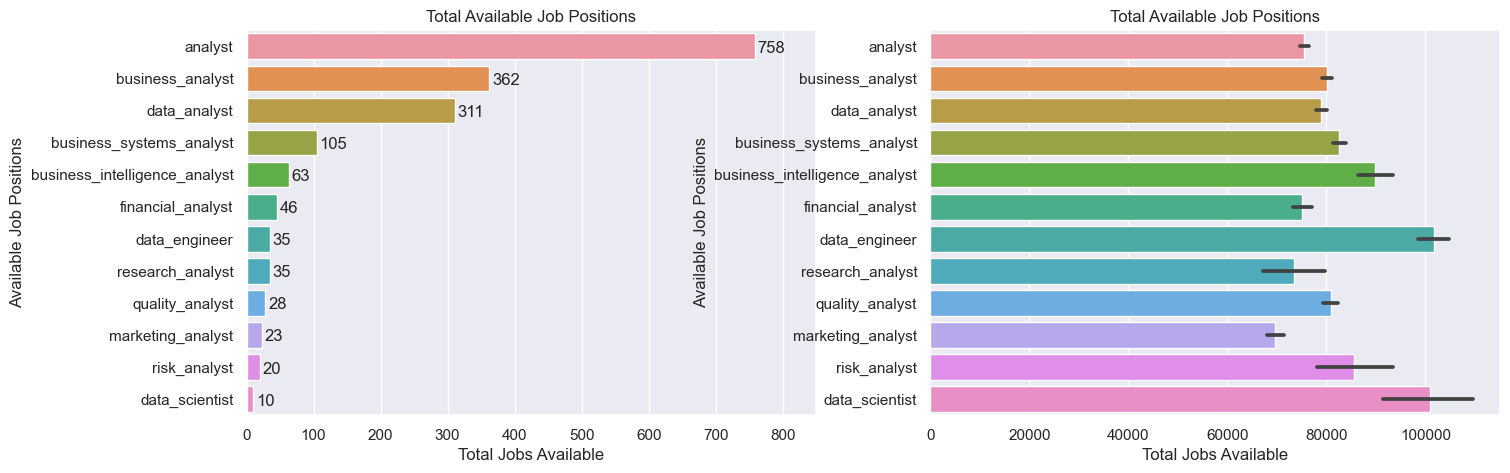

In [41]:
plt.figure(figsize=[25, 5])
sns.set(style='darkgrid')

plt.subplot(1, 3, 1)
total_jobs = sns.countplot(data=df,
              y='job_title',
              order=df['job_title'].value_counts().index)

for rect in total_jobs.patches:
    y_value = rect.get_y() + (rect.get_height() + 0.2) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    total_jobs.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center')

plt.title('Total Available Job Positions')
plt.xlabel('Total Jobs Available')
plt.xlim([0,850])
plt.ylabel('Available Job Positions')

plt.subplot(1, 3, 2)
sns.barplot(data=df,
                      x='avg_salary',
                      y='job_title',
                      order = df['job_title'].value_counts().index)

plt.title('Total Available Job Positions')
plt.xlabel('Total Jobs Available')
plt.ylabel('Available Job Positions')


### Job Availability by Work Experience

Text(0, 0.5, 'Average Annual Salary')

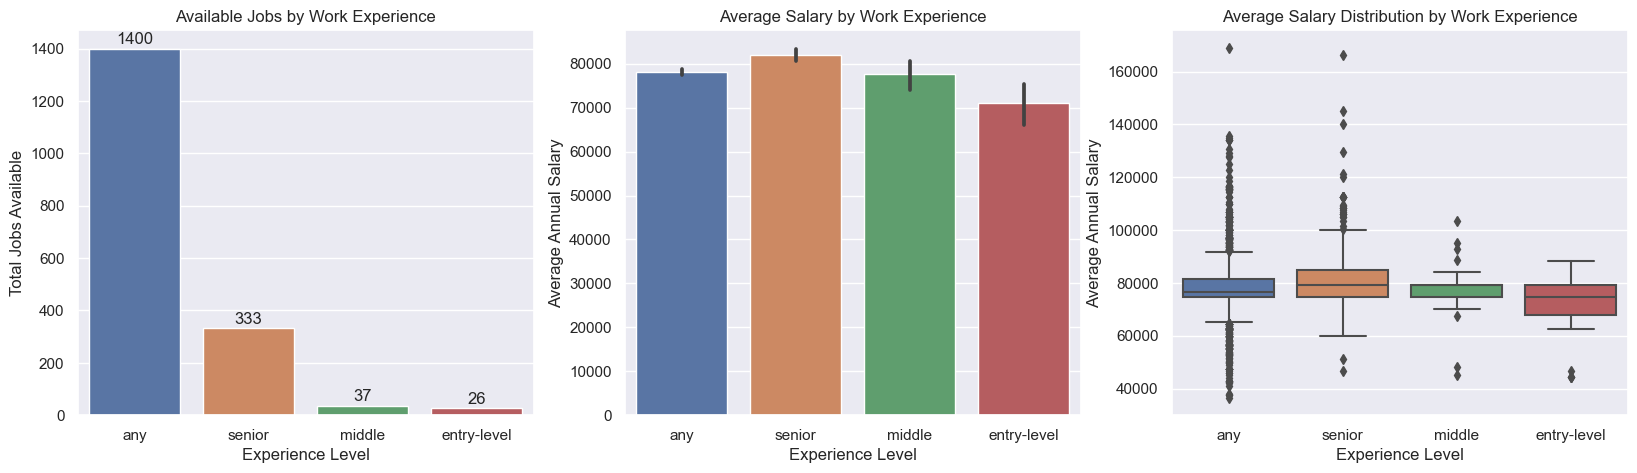

In [42]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 3, 1)
exp_count = sns.countplot(data=df,
                          x='experience_level',
                          order = df['experience_level'].value_counts().index)

for total in exp_count.patches:
    y_value = total.get_height()
    x_value = total.get_x() + total.get_width() / 2
    label = '{:.0f}'.format(y_value)
    exp_count.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')

plt.title('Available Jobs by Work Experience')
plt.xlabel('Experience Level')
plt.ylabel('Total Jobs Available')

plt.subplot(1, 3, 2)
exp_avg_salary = sns.barplot(data=df,
                             x='experience_level',
                             y='avg_salary',
                             order = df['experience_level'].value_counts().index)

plt.title('Average Salary by Work Experience')
plt.xlabel('Experience Level')
plt.ylabel('Average Annual Salary')

plt.subplot(1, 3, 3)
exp_box = sns.boxplot(data=df,
                      x='experience_level',
                      y='avg_salary',
                      order = df['experience_level'].value_counts().index)

plt.title('Average Salary Distribution by Work Experience')
plt.xlabel('Experience Level')
plt.ylabel('Average Annual Salary')

### Jobs Available by Platform

Text(0, 0.5, 'Web Platform')

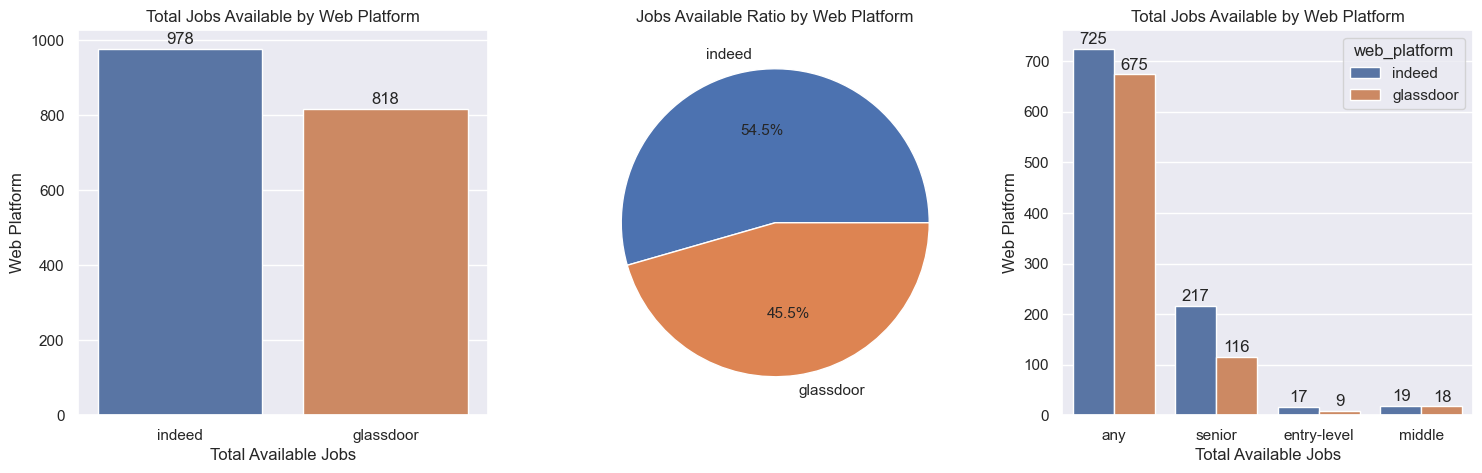

In [43]:
plt.figure(figsize=[18, 5])

plt.subplot(1, 3, 1)
web_total = sns.countplot(data=df,
                          x='web_platform')

for total in web_total.patches:
    y_value = total.get_height()
    x_value = total.get_x() + total.get_width() / 2
    label = '{:.0f}'.format(y_value)
    web_total.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')

plt.title('Total Jobs Available by Web Platform')
plt.xlabel('Total Available Jobs')
plt.ylabel('Web Platform')
    
plt.subplot(1, 3, 2)
df['web_platform'].value_counts().plot(kind='pie',
                                       fontsize=11,
                                       autopct='%1.1f%%',
                                       subplots=True)
plt.title('Jobs Available Ratio by Web Platform')
plt.ylabel(None)

plt.subplot(1, 3, 3)
exp_total = sns.countplot(data=df,
                          x='experience_level',
                          hue='web_platform')

for total in exp_total.patches:
    y_value = total.get_height()
    x_value = total.get_x() + total.get_width() / 2
    label = '{:.0f}'.format(y_value)
    exp_total.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')

plt.title('Total Jobs Available by Web Platform')
plt.xlabel('Total Available Jobs')
plt.ylabel('Web Platform')

### Salary Distribution

Text(0.5, 0, 'Average Salary')

<Figure size 640x480 with 0 Axes>

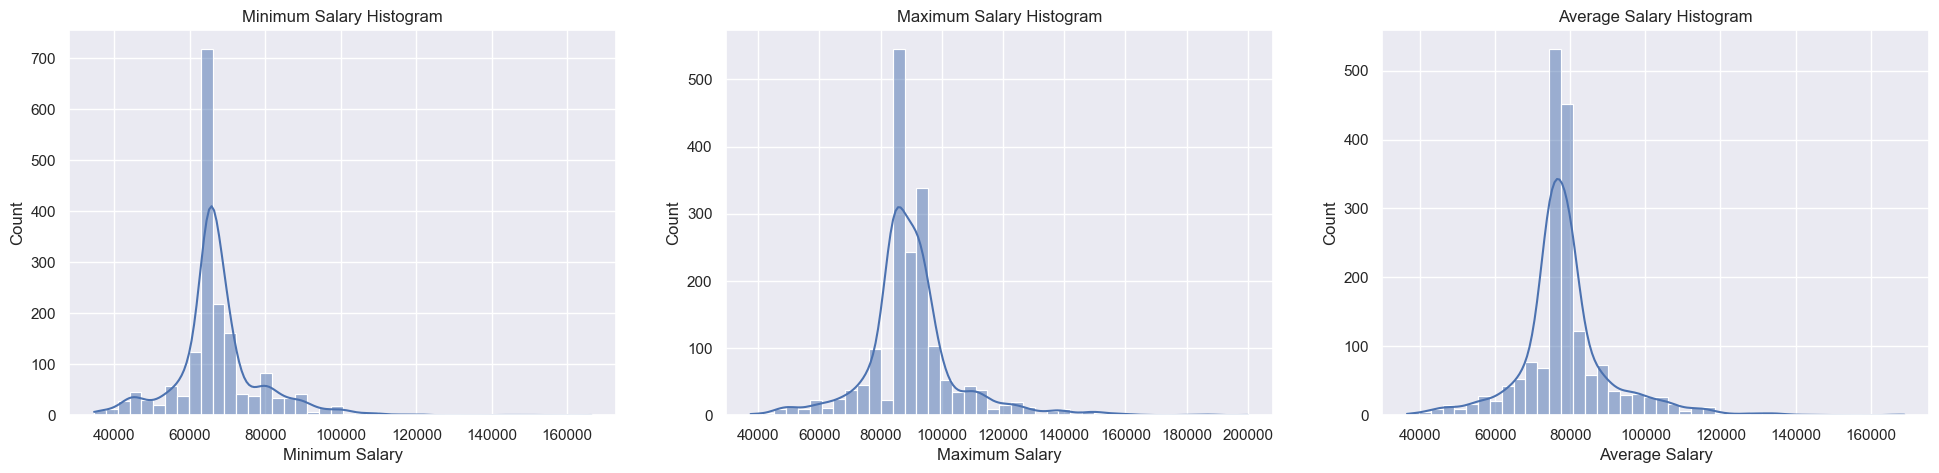

In [44]:
plt.subplots_adjust(wspace=1, hspace=0.3)
plt.figure(figsize=[24, 5])

plt.subplot(1, 3, 1)
sns.histplot(data=df,
             x='min_salary',
             bins=42,
             kde=True)
plt.title('Minimum Salary Histogram')
plt.xlabel('Minimum Salary')

plt.subplot(1, 3, 2)
sns.histplot(data=df,
             x='max_salary',
             bins=42,
             kde=True)
plt.title('Maximum Salary Histogram')
plt.xlabel('Maximum Salary')

plt.subplot(1, 3, 3)
sns.histplot(data=df,
             x='avg_salary',
             bins=42,
             kde=True)
plt.title('Average Salary Histogram')
plt.xlabel('Average Salary')

### Top Skills in Demand

In [45]:
new_skill = df['tech_skills'].str.split(',_', n=17, expand=True)

df['skill_1'] = new_skill[0]
df['skill_2'] = new_skill[1]
df['skill_3'] = new_skill[2]
df['skill_4'] = new_skill[3]
df['skill_5'] = new_skill[4]
df['skill_6'] = new_skill[5]
df['skill_7'] = new_skill[6]
df['skill_8'] = new_skill[7]
df['skill_9'] = new_skill[8]
df['skill_10'] = new_skill[9]
df['skill_11'] = new_skill[10]
df['skill_12'] = new_skill[11]
df['skill_13'] = new_skill[12]
df['skill_14'] = new_skill[13]
df['skill_15'] = new_skill[14]
df['skill_16'] = new_skill[15]
df['skill_17'] = new_skill[16]
df['skill_18'] = new_skill[17]

total_skills = df[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6',
                   'skill_7', 'skill_8', 'skill_9', 'skill_10', 'skill_11', 'skill_12',
                   'skill_13', 'skill_14', 'skill_15', 'skill_16', 'skill_17', 'skill_18']]

total_skills = total_skills.stack().tolist()
total_skills = [i for i in total_skills if i != 'unknown']
skill_counter = Counter(total_skills)

skill_df = pd.DataFrame.from_dict(skill_counter, orient='index', columns=['count'])
skill_df.reset_index(inplace=True)
skill_df.rename(columns={'index': 'skill'}, inplace=True)

t10 = (skill_df.sort_values(by='count', ascending=False)).head(10)

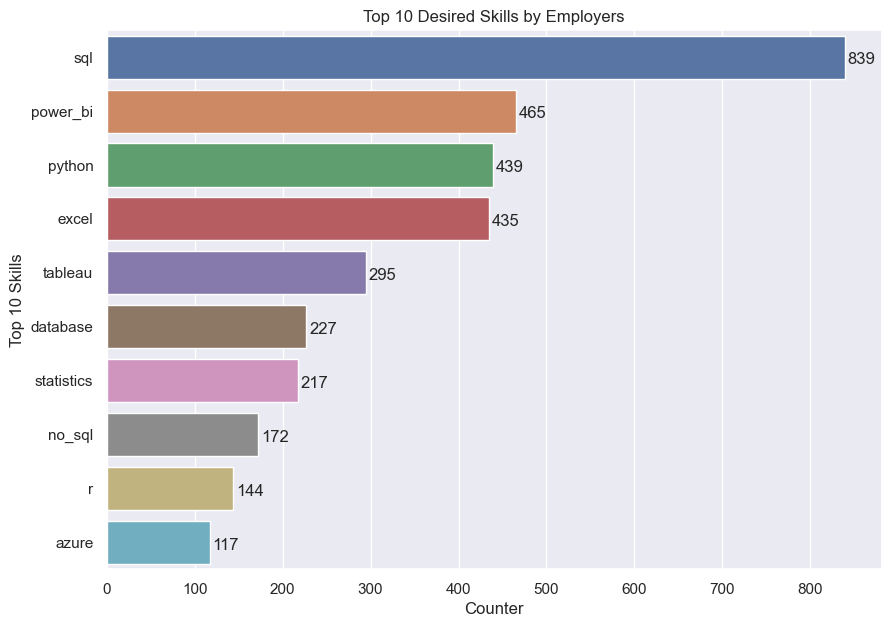

In [46]:
plt.figure(figsize=[10, 7])

top_10_skills = sns.barplot(data=t10,
                            x='count',
                            y='skill')

for rect in top_10_skills.patches:
    y_value = rect.get_y() + (rect.get_height() + 0.15) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    top_10_skills.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center')

plt.title('Top 10 Desired Skills by Employers')
plt.ylabel('Top 10 Skills')
plt.xlabel('Counter')

plt.show()

### Jobs by Geography

In [47]:
top_20_cities_nonremote = df[df['city'] != 'remote'].agg({'city': 'value_counts'}).head(20).to_dict()
top_20_cities_count = pd.DataFrame.from_dict(top_20_cities_nonremote)
top_20_cities_count.reset_index(inplace=True)
top_20_cities_count.rename(columns={'index': 'city', 'city': 'count'}, inplace=True)
top_20_cities = top_20_cities_count.sort_values(by='count', ascending=False)
top_20_cities

,city,count
15,toronto,446
9,mississauga,117
16,vancouver,114
10,montreal,104
2,calgary,101
3,edmonton,60
8,markham,49
12,ottawa,48
0,brampton,38
13,richmond,30


In [48]:
top_20_list = top_20_cities['city'].tolist()
df[df['city'].isin(top_20_list)].groupby('city')['avg_salary'].median()

city
brampton       74750.0
burnaby        79000.0
calgary        79000.0
edmonton       78029.5
etobicoke      74750.0
halifax        74750.0
hamilton       74750.0
london         74750.0
markham        74750.0
mississauga    78000.0
montreal       79000.0
north_york     76750.0
ottawa         74750.0
richmond       79000.0
surrey         80000.0
toronto        79000.0
vancouver      79000.0
victoria       97010.0
waterloo       71300.0
winnipeg       74750.0
Name: avg_salary, dtype: float64

In [49]:
# Create a map centered on Canada
canada_map = folium.Map(location=[55.1304, -95.3468],
                        zoom_start=5,
                        tiles='OpenStreetMap',
                        font_size=15)
# cartodb positron

# Locations of top 20 hubs with most (non-remote) job postings 
top_10_cities = [['43.6532', '-79.3832', 'Toronto', '446 Job Openings', 'Median Salary: 79,000'],
                 ['43.5953', '-79.6405', 'Mississauga', '117 Job Openings', 'Median Salary: 78,000'],
                 ['49.2462', '-123.1162', 'Vancouver', '114 Job Openings', 'Median Salary: 79,000'],
                 ['45.5088', '-73.5616', 'Montreal', '104 Job Openings', 'Median Salary: 79,000'],
                 ['51.0499', '-114.0666', 'Calgary', '101 Job Openings', 'Median Salary: 79,000'],
                 ['53.6316', '-113.3239', 'Edmonton', '60 Job Openings', 'Median Salary: 78,029'],
                 ['43.8560', '-79.3370', 'Markham', '49 Job Openings', 'Median Salary: 74,750'],
                 ['45.4247', '-75.6950', 'Ottawa', '48 Job Openings', 'Median Salary: 74,750'],
                 ['43.7315', '-79.7666', 'Brampton', '38 Job Openings', 'Median Salary: 74,750'],
                 ['49.8950', '-97.1384', 'Winnipeg', '30 Job Openings', 'Median Salary: 74,750'],
                 ['49.1665', '-123.1335', 'Richmond', '30 Job Openings', 'Median Salary: 79,000'],
                 ['43.7615', '-79.4110', 'North York', '26 Job Openings', 'Median Salary: 76,750'],
                 ['48.4284', '-123.3656', 'Victoria', '23 Job Openings', 'Median Salary: 97,010'],
                 ['42.9849', '-81.2497', 'London', '22 Job Openings', 'Median Salary: 74,750'],
                 ['49.1913', '-122.8490', 'Surrey', '21 Job Openings', 'Median Salary: 80,000'],
                 ['44.8857', '-63.1005', 'Halifax', '20 Job Openings', 'Median Salary: 74,750'],
                 ['49.2488', '-122.9805', 'Burnaby', '19 Job Openings', 'Median Salary: 79,000'],
                 ['43.4643', '-80.5166', 'Waterloo', '17 Job Openings', 'Median Salary: 71,300'],
                 ['43.6205', '-79.5131', 'Etobicoke', '15 Job Openings', 'Median Salary: 74,750'],
                 ['43.2557', '-79.8711', 'Hamilton', '14 Job Openings', 'Median Salary: 74,750']]

# Loop for map markers
for row in top_10_cities:
    folium.Marker(location=[row[0], row[1]],
                  tooltip=[row[3], row[4]],
                  popup=row[2],
                  icon=folium.Icon(color='red',
                                    icon='info-sign')).add_to(canada_map)
    
    folium.CircleMarker(location=[row[0], row[1]],
                        radius=10,
                        popup=row[2],
                        color='red',
                        fill=True,
                        fill_color='red').add_to(canada_map)
    
canada_map.save('canada_map.html')
canada_map

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

Aman Bhattarai. (2024, August). Data Analyst Job Roles in Canada, Version 1. Retrieved Sep 1, 2024 from [Kaggle](https://www.kaggle.com/datasets/amanbhattarai695/data-analyst-job-roles-in-canada).

[Back to Table of Contents](#back)